This one is using the keras ocr 2 method with the focus on images variable

# Recognizing words

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras_ocr
import cv2
import numpy as np
import os
pwd = os.getcwd()

In [2]:
#set seed
from numpy.random import seed
seed(42)

## Capital Letters

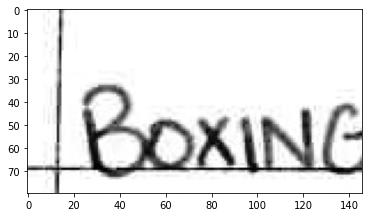

In [4]:
datadir_capital = pwd + "\Capital"
categories_capital = ["BOXING","FIVE","JUMP","QUICKLY","THE","WIZARDS"]

for category in categories_capital:
    path = os.path.join(datadir_capital, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        break
    break

In [5]:
img_array.shape

(80, 146)

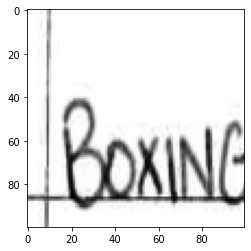

In [6]:
img_size = 100
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [10]:
data_capital = []
images_capital = []

def create_dataset_capital():
    for category in categories_capital:
        path = os.path.join(datadir_capital, category)
        class_num = categories_capital.index(category)
        for img in os.listdir(path):
            images_capital.append(keras_ocr.tools.read(os.path.join(path, img)))
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            data_capital.append([new_array, class_num])
create_dataset_capital()

In [ ]:
len(images_capital)

## Common Letters

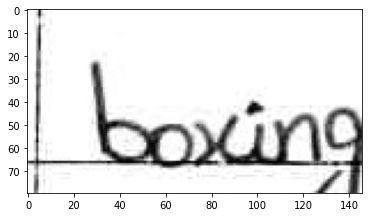

In [26]:
datadir_common = pwd+"small"
categories_common = ["boxing","five","jump","quickly","the","wizards"]

for category in categories_common:
    path = os.path.join(datadir_common, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        #check image
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [ ]:
data_common = []
images_common = []

def create_dataset_common():
    for category in categories_common:
        path = os.path.join(datadir_common, category)
        class_num = categories_common.index(category)
        for img in os.listdir(path):
            images_common.append(keras_ocr.tools.read(os.path.join(path, img)))
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            data_common.append([new_array, class_num])
create_dataset_common()

## Prediction

In [23]:
X_capital = []
y_capital = []

for features, label in data_capital:
    X_capital.append(features)
    y_capital.append(label)
    
X_common = []
y_common = []

for features, label in data_common:
    X_common.append(features)
    y_common.append(label)

X = X_capital + X_common
y = y_capital + y_common

images = images_capital + images_common

In [11]:
pipeline = keras_ocr.pipeline.Pipeline()
prediction = pipeline.recognize(images)

Looking for C:\Users\leigh\.keras-ocr\craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for C:\Users\leigh\.keras-ocr\crnn_kurapan.h5


In [ ]:
prediction

C:\Users\leigh\Anaconda3\lib\site-packages\keras_ocr\tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


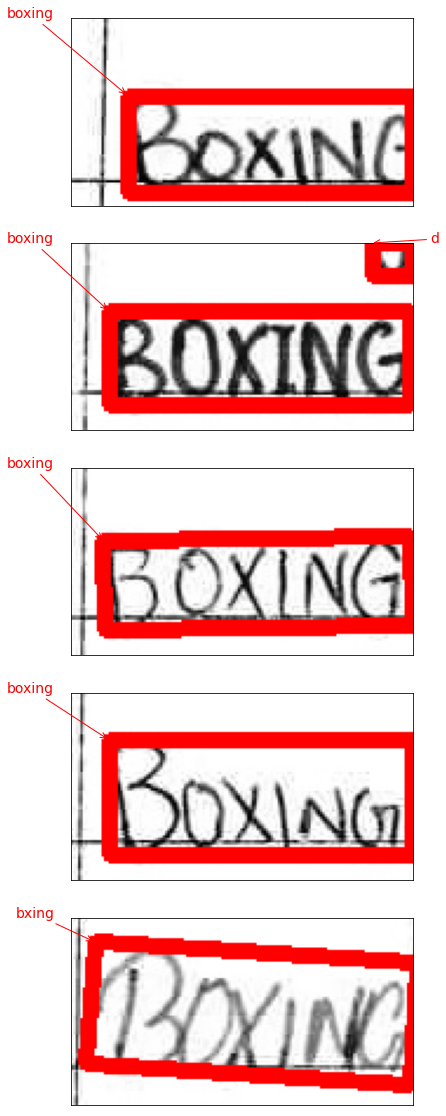

In [12]:
fig, axs = plt.subplots(nrows=len(images[:5]), figsize=(20,20))
for ax, image, predictions in zip(axs, images[:5], prediction[:5]):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

In [13]:
y_pred = []

for i in range(len(prediction)):
    try:
        y_pred.append(p[i][0][0])
    except Exception as e:
        print(e)

In [ ]:
#evaulation
#print("Accuracy: ", sum(data['y_actual'] == data['y_pred'])/ len(data))